<a href="https://colab.research.google.com/github/345lakshayaggarwal-prog/EDA-Using-Python/blob/main/Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Complete Hypothesis Testing Workflow**

In [18]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [19]:
# Load dataset (Control vs Test group results)
ab_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ab_data.csv", sep=',', on_bad_lines='skip')
print('Sample Data:\n', ab_data.head())

Sample Data:
     user_id                   timestamp      group landing_page  converted
0  851104.0  2017-01-21 22:11:48.556739    control     old_page        0.0
1  804228.0  2017-01-12 08:01:45.159739    control     old_page        0.0
2  661590.0  2017-01-11 16:55:06.154213  treatment     new_page        0.0
3  853541.0  2017-01-08 18:28:03.143765  treatment     new_page        0.0
4  864975.0  2017-01-21 01:52:26.210827    control     old_page        1.0


In [20]:
# 1. Formulate Hypotheses
# H₀: New design conversion rate ≤ Old design (p_new - p_old ≤ 0)
# H₁: New design conversion rate > Old design (p_new - p_old > 0)

In [21]:
# Generate summary
summary = (ab_data.groupby("group")["converted"].agg(Visitors="count",Conversions="sum",Conversion_rate="mean").reset_index())

# Display summary
print("A/B Test Data Summary:\n", summary)

A/B Test Data Summary:
           group  Visitors  Conversions  Conversion_rate
0             1         0          0.0              NaN
1       control    275044      33068.0         0.120228
2      new_page         0          0.0              NaN
3  treaold_page         0          0.0              NaN
4        treatm         1          0.0         0.000000
5     treatment    275059      32679.0         0.118807
6    treatmente         0          0.0              NaN


In [22]:
# Generate summary
summary = (
    ab_data[ab_data["group"].isin(["control", "treatment"])]
    .groupby("group")["converted"]
    .agg(
        Visitors="count",
        Conversions="sum",
        Conversion_rate="mean"
    ))

# Display summary
print("A/B Test Data Summary:\n", summary)

A/B Test Data Summary:
            Visitors  Conversions  Conversion_rate
group                                            
control      275044      33068.0         0.120228
treatment    275059      32679.0         0.118807


# **Key Responsibilities & Statistical Testing**

**1. Two-Proportion Z-Test**

In [23]:
# Extract conversion counts
conv_old = ab_data[ab_data['group'] == 'control']['converted'].sum()
conv_new = ab_data[ab_data['group'] == 'treatment']['converted'].sum()
n_old = ab_data[ab_data['group'] == 'control'].shape[0]
n_new = ab_data[ab_data['group'] == 'treatment'].shape[0]

In [24]:
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

# Perform Z-test
z_score, p_value = proportions_ztest(
[conv_new, conv_old],
[n_new, n_old],
alternative='larger' # One-tailed test
)
print(f"Z-score: {z_score:.2f}, p-value: {p_value:.4f}")

Z-score: -1.62, p-value: 0.9478


**2. Confidence Interval Visualization**

In [25]:
# Calculate 95% CIs
from statsmodels.stats.proportion import proportion_confint
ci_old = proportion_confint(conv_old, n_old, alpha=0.05)
ci_new = proportion_confint(conv_new, n_new, alpha=0.05)

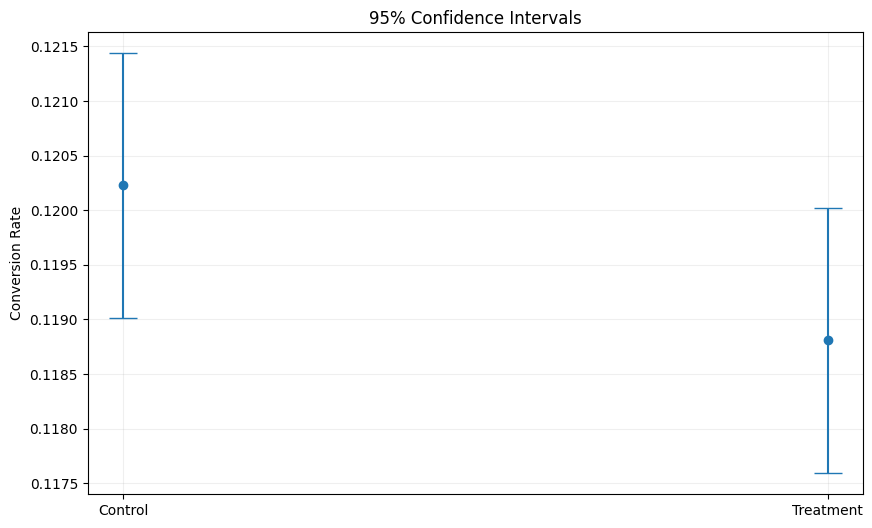

In [26]:
# Plot results
plt.figure(figsize=(10,6))

# Get the mean conversion rates from the summary dataframe
mean_old = summary.loc['control', 'Conversion_rate']
mean_new = summary.loc['treatment', 'Conversion_rate']

plt.errorbar(x=[0,1], y=[mean_old, mean_new],
             yerr=[[mean_old - ci_old[0]], [mean_new - ci_new[0]]],
             fmt='o', capsize=10)
plt.xticks([0,1], ['Control', 'Treatment'])
plt.ylabel('Conversion Rate')
plt.title('95% Confidence Intervals')
plt.grid(alpha=0.2)

# **Advanced Testing Scenarios**

**Chi-Square Test (Categorical Relationships)**

In [27]:
# Example: Test if device type affects conversion
contingency_table = pd.crosstab(ab_data['group'], ab_data['converted'])
chi2, p, dof, _ = stats.chi2_contingency(contingency_table)
print(f"Chi-square p-value: {p:.5f}")

Chi-square p-value: 0.24984


# **Experimental Design Principles**

**1. Sample Size Calculation:**

In [32]:
from statsmodels.stats.power import TTestIndPower
effect_size = 0.2 # Minimum detectable effect
power = 0.8 # Standard power level
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, alpha=0.05)

print(f"Required sample per group: {int(sample_size)}")

Required sample per group: 393
